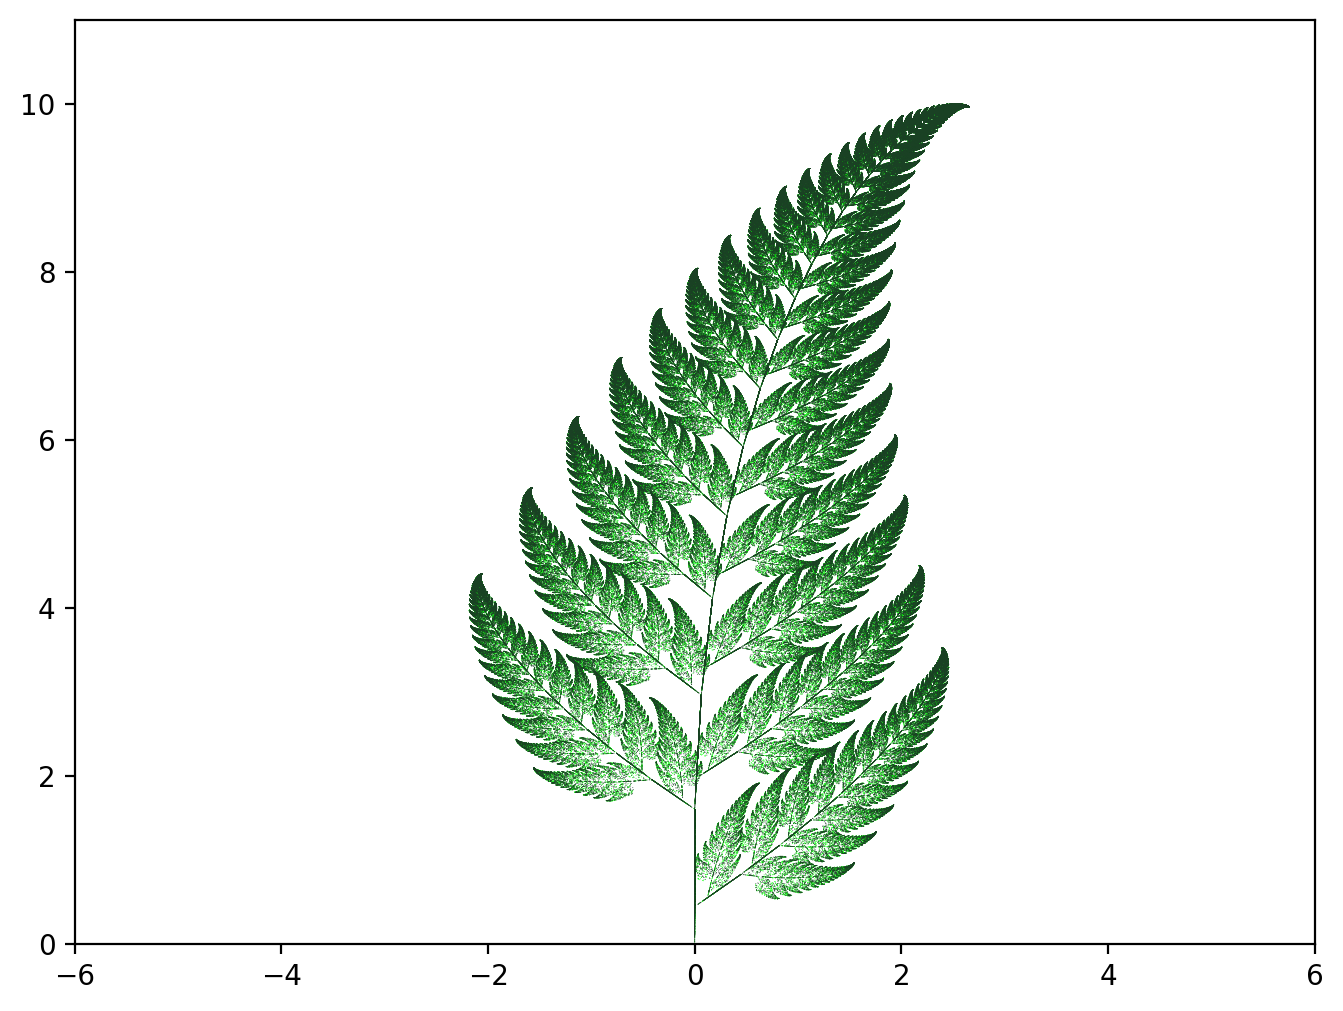

CPU times: user 3.54 s, sys: 226 ms, total: 3.77 s
Wall time: 3.72 s


In [3]:
%%time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
figure(figsize=(8, 6), dpi=200)

# Definir posicion inicial
x, y = 0, 0

# Definir las funciones del helecho de Barnsley
def funcion1(x, y):
    return 0, 0.16*y

def funcion2(x, y):
    return 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6

def funcion3(x, y):
    return 0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6

def funcion4(x, y):
    return -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44

# Definir las probabilidades de cada funcion
probabilidad = [0.01, 0.85, 0.07, 0.07]

npuntos = 1000000

# Crear los puntos con list comprehension
puntos = [(0, 0)]
for i in range(npuntos):
    r = np.random.rand()
    if r < probabilidad[0]:
        puntos.append(funcion1(*puntos[-1]))
    elif r < probabilidad[0] + probabilidad[1]:
        puntos.append(funcion2(*puntos[-1]))
    elif r < probabilidad[0] + probabilidad[1] + probabilidad[2]:
        puntos.append(funcion3(*puntos[-1]))
    else:
        puntos.append(funcion4(*puntos[-1]))

# Convertir la lista a arrays con NumPy
puntos_array = np.array(puntos)
x_1 = puntos_array[:, 0]
y_1 = puntos_array[:, 1]

# Definir el colormap (normalized RGB)
colores = [(0, 1, 0),(0.106, 0.255, 0.145)]
cm = LinearSegmentedColormap.from_list('test', colores, N=2)
color = cm(np.linspace(0, 1, len(x_1)))

# Graficar el scatter plot
plt.scatter(x_1, y_1, s=0.1, marker='o', c=color, edgecolors='none')

# Grafico
plt.xlim(-6, 6)
plt.ylim(0, 11)
plt.show()